## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [0]:
# answer goes here


finance= pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv')


As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [3]:
# answer goes here

X= finance.filter(regex='score')
X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 4 columns):
FWBscore    6394 non-null int64
FSscore     6394 non-null int64
LMscore     6394 non-null int64
KHscore     6394 non-null float64
dtypes: float64(1), int64(3)
memory usage: 199.9 KB


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [0]:
# answer goes here

scaler = StandardScaler()
X_std = scaler.fit_transform(X)



Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

In [0]:
# answer goes here
from scipy.spatial.distance import cdist
distortions= []
K= range(2,30)

for k in K:
  models= KMeans(n_clusters=k).fit(X_std)
  models.fit(X_std)
  distortions.append(sum(np.min(cdist(X_std, models.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

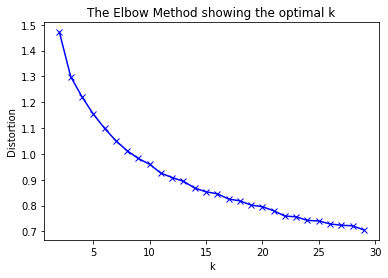

In [19]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

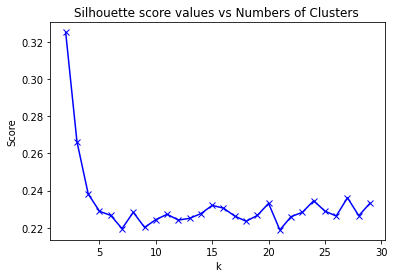

In [32]:
# answer goes here
import sklearn
from sklearn import cluster

silhouette_score_values=list()

for k in K:
    
    classifier=cluster.KMeans(k,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(X_std)
    labels= classifier.predict(X_std)
    silhouette_score_values.append(sklearn.metrics.silhouette_score(X_std,labels ,metric='euclidean', sample_size=None, random_state=None))
 
plt.plot(K, silhouette_score_values, 'bx-')
plt.xlabel('k')
plt.ylabel('Score')
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
# Optimal_NumberOf_Components=K[silhouette_score_values.index(max(silhouette_score_values))]
# print "Optimal number of components is:"
# print Optimal_NumberOf_Components




In [0]:
K= 20?